In [6]:
import cv2
import os
import glob
from tqdm import tqdm



In [7]:
import numpy as np
from scipy import signal
def optical_flow(I1g, I2g, window_size, tau=1e-2):
 
    kernel_x = np.array([[-1., 1.], [-1., 1.]])
    kernel_y = np.array([[-1., -1.], [1., 1.]])
    kernel_t = np.array([[1., 1.], [1., 1.]])#*.25
    w = window_size/2 # window_size is odd, all the pixels with offset in between [-w, w] are inside the window
    I1g = I1g / 255. # normalize pixels
    I2g = I2g / 255. # normalize pixels
    # Implement Lucas Kanade
    # for each point, calculate I_x, I_y, I_t
    mode = 'same'
    fx = signal.convolve2d(I1g, kernel_x, boundary='symm', mode=mode)
    fy = signal.convolve2d(I1g, kernel_y, boundary='symm', mode=mode)
    ft = signal.convolve2d(I2g, kernel_t, boundary='symm', mode=mode) + signal.convolve2d(I1g, -kernel_t, boundary='symm', mode=mode)
    u = np.zeros(I1g.shape)
    v = np.zeros(I1g.shape)
    # within window window_size * window_size
    for i in range(int(w), int(I1g.shape[0]-w)):
        for j in range(int(w), int(I1g.shape[1]-w)):
            Ix = fx[int(i-w):int(i+w+1), int(j-w):int(j+w+1)].flatten()
            Iy = fy[int(i-w):int(i+w+1), int(j-w):int(j+w+1)].flatten()
            It = ft[int(i-w):int(i+w+1), int(j-w):int(j+w+1)].flatten()
            b = np.reshape(It, (It.shape[0],1)) # get b here
            A = np.vstack((Ix, Iy)).T # get A here
            
            if np.min(abs(np.linalg.eigvals(np.matmul(A.T, A)))) >= tau:
                nu = np.matmul(np.linalg.pinv(A), b) # get velocity here
                u[i,j]=nu[0]
                v[i,j]=nu[1]
 
    return (u,v)

In [8]:
import matplotlib.pyplot as plt

def plot_optical_flow(img,U,V):
    '''
    Plots optical flow given U,V and one of the images
    '''
    # Change t if required, affects the number of arrows
    # t should be between 1 and min(U.shape[0],U.shape[1])
    t=10
    # Subsample U and V to get visually pleasing output
    U1 = U[::t,::t]
    V1 = V[::t,::t]
    # Create meshgrid of subsampled coordinates
    r, c = img.shape[0],img.shape[1]
    cols,rows = np.meshgrid(np.linspace(0,c-1,c), np.linspace(0,r-1,r))
    cols = cols[::t,::t]
    rows = rows[::t,::t]
    # Plot optical flow
    plt.figure(figsize=(10,10))
    plt.imshow(img)
    plt.quiver(cols,rows,U1,V1)
    plt.show()


  0%|                                                                                           | 0/12 [00:00<?, ?it/s]

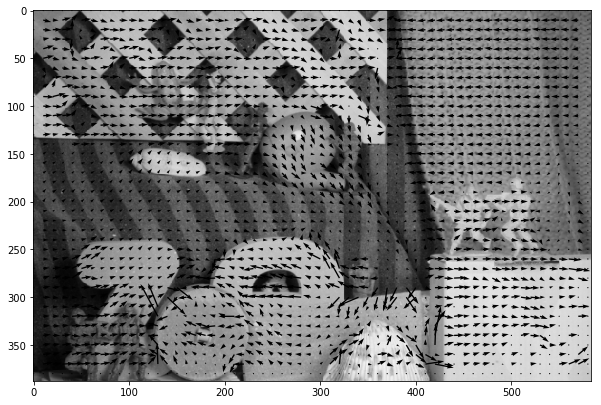

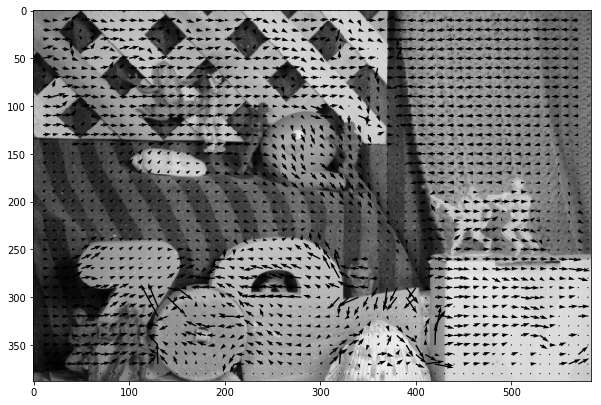


  8%|██████▉                                                                            | 1/12 [00:17<03:14, 17.64s/it]

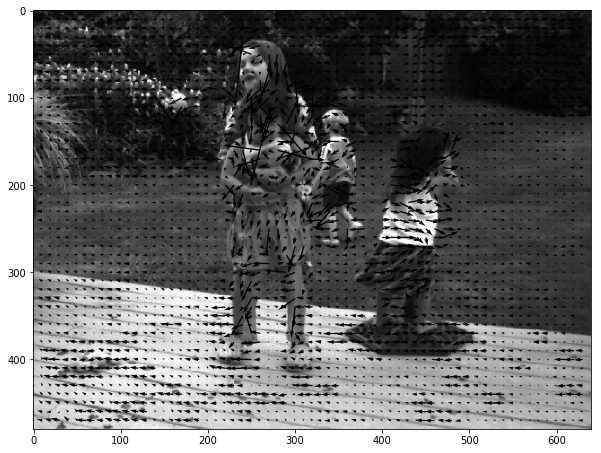

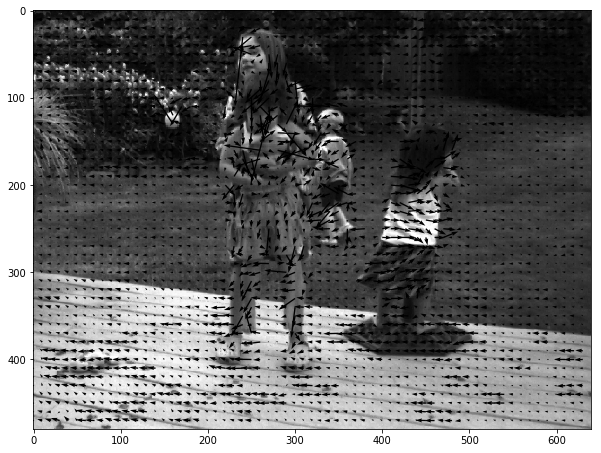


 17%|█████████████▊                                                                     | 2/12 [00:42<03:17, 19.77s/it]

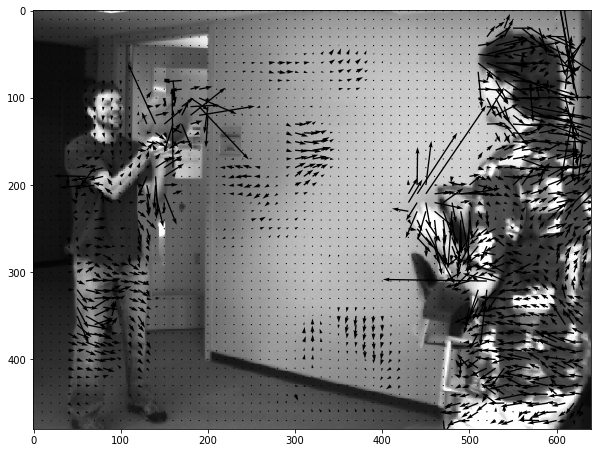

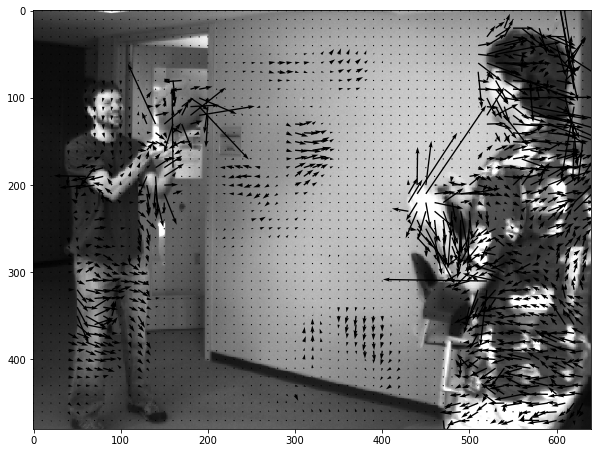


 25%|████████████████████▊                                                              | 3/12 [01:06<03:08, 20.98s/it]

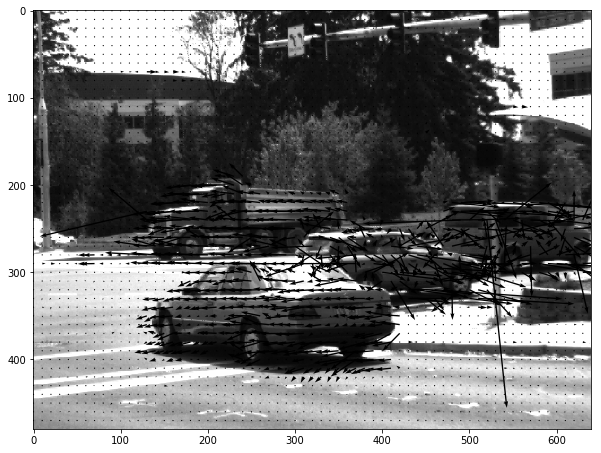

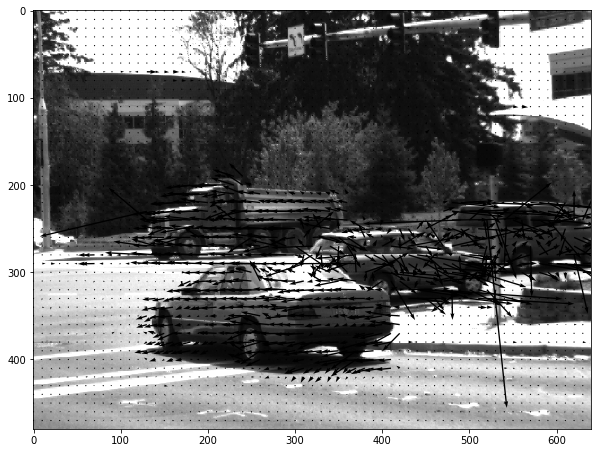


 33%|███████████████████████████▋                                                       | 4/12 [01:29<02:54, 21.78s/it]

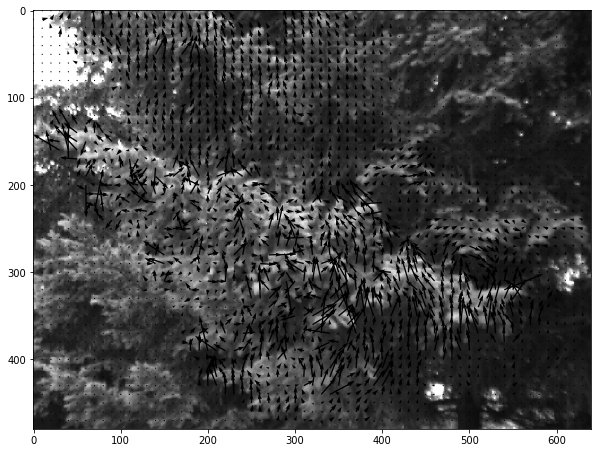

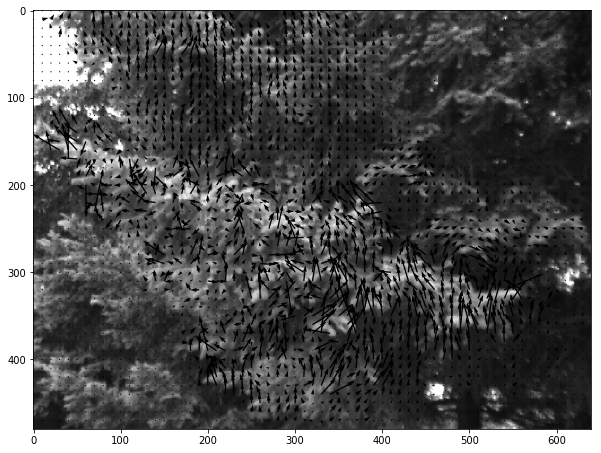


 42%|██████████████████████████████████▌                                                | 5/12 [01:54<02:38, 22.60s/it]

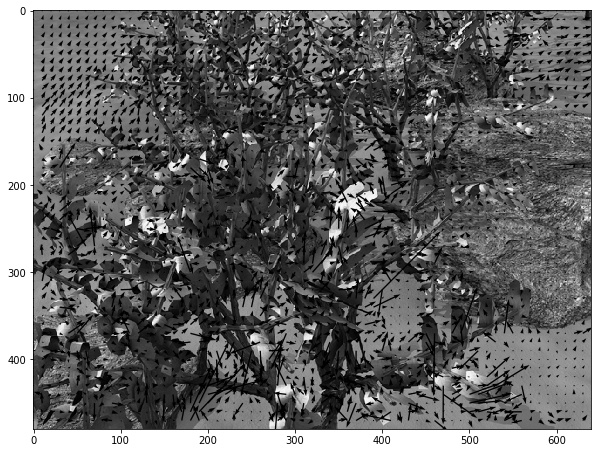

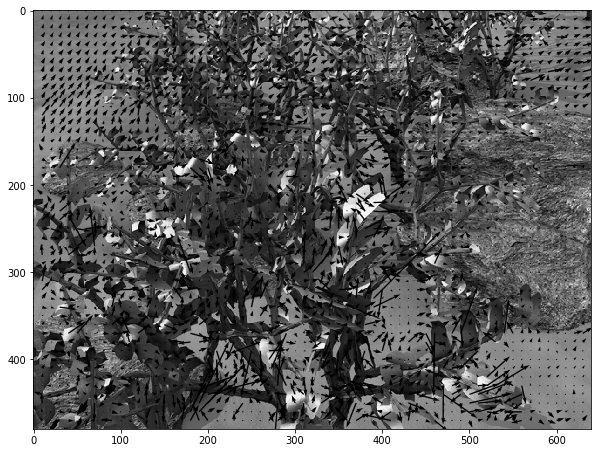


 50%|█████████████████████████████████████████▌                                         | 6/12 [02:19<02:20, 23.44s/it]

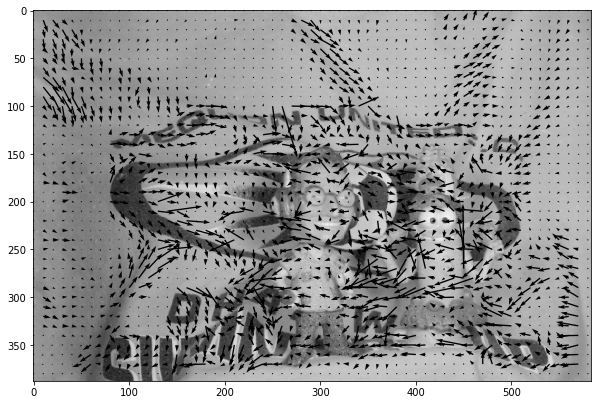

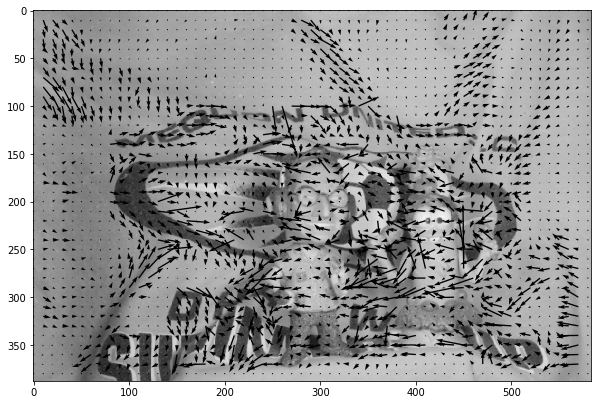


 58%|████████████████████████████████████████████████▍                                  | 7/12 [02:39<01:50, 22.18s/it]

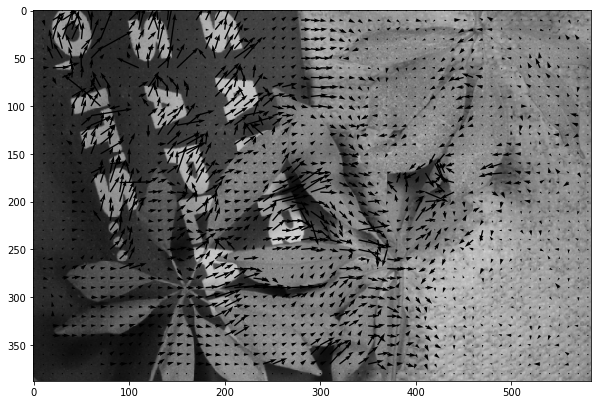

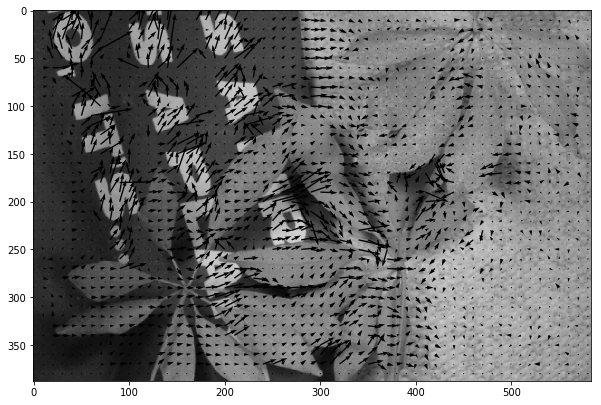


 67%|███████████████████████████████████████████████████████▎                           | 8/12 [02:57<01:24, 21.07s/it]

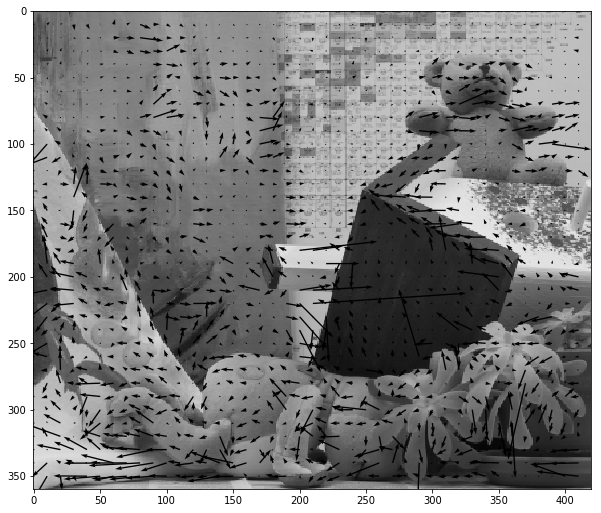

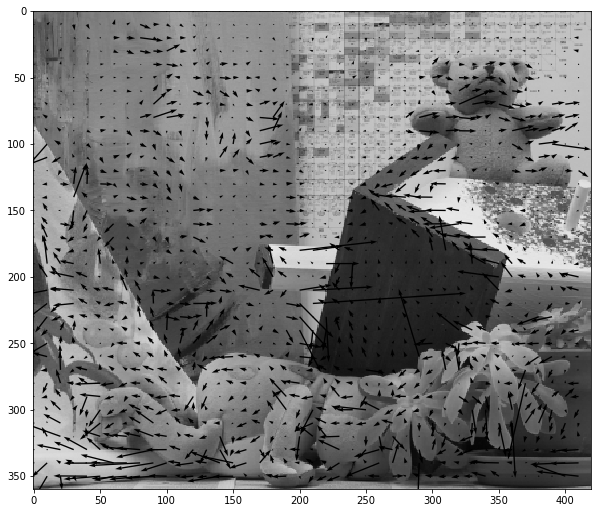


 75%|██████████████████████████████████████████████████████████████▎                    | 9/12 [03:09<00:55, 18.48s/it]

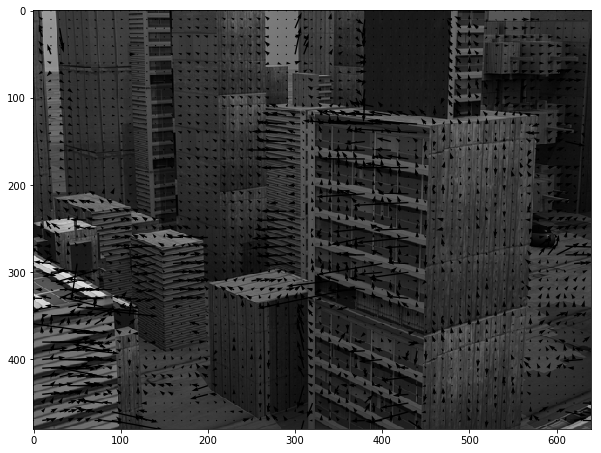

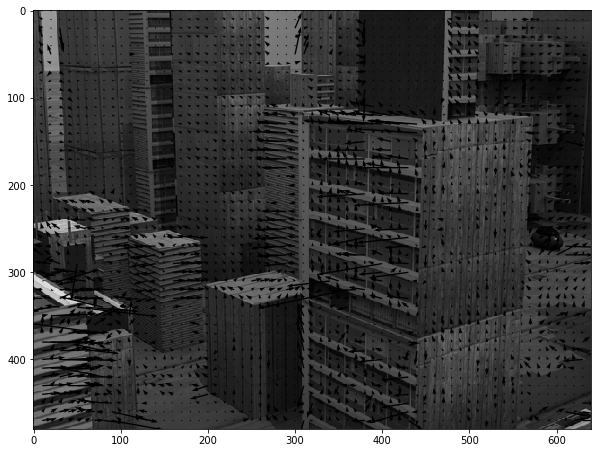


 83%|████████████████████████████████████████████████████████████████████▎             | 10/12 [03:34<00:40, 20.41s/it]

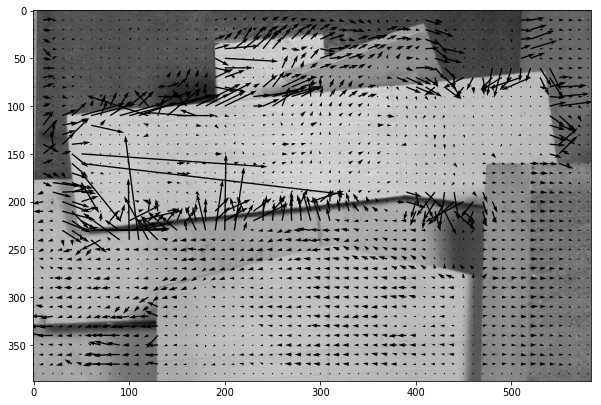

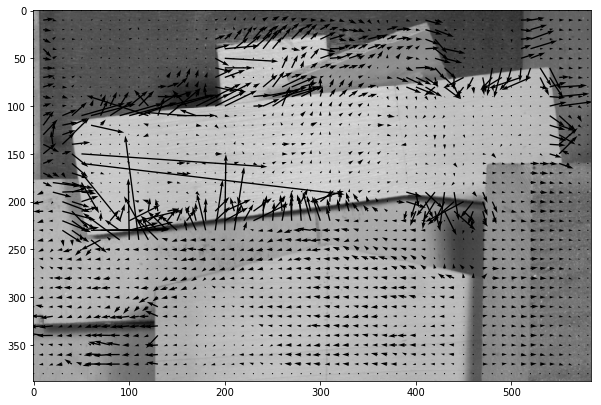


 92%|███████████████████████████████████████████████████████████████████████████▏      | 11/12 [03:52<00:19, 19.73s/it]

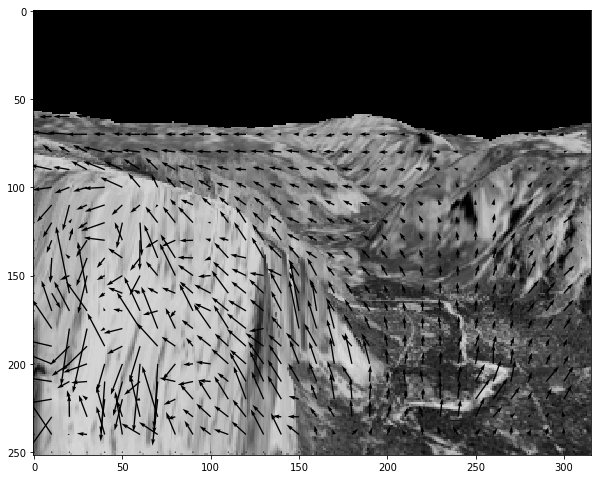

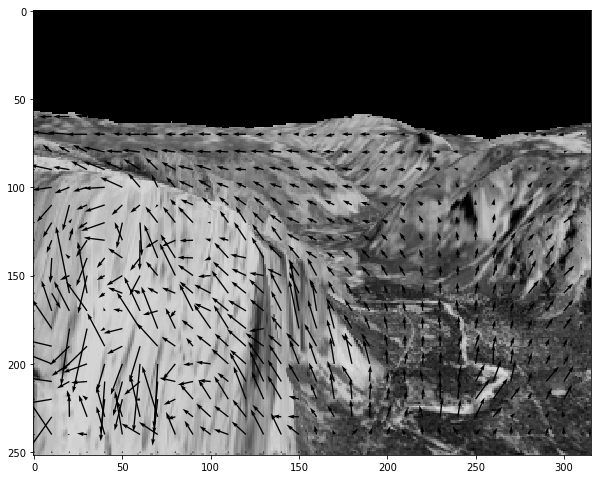


100%|██████████████████████████████████████████████████████████████████████████████████| 12/12 [03:58<00:00, 19.86s/it]


In [9]:
import matplotlib.pyplot as plt
dir='C:/Users/Tushar/Computer Vision/assignment5/eval-data-gray'
dirlist = os.listdir(dir)
for path in tqdm(dirlist):
    file = glob.glob(dir +'/'+ path + '/*.png')
    j=0
    for i in file:
        if j==0:
            img1=cv2.imread(i)
            gray1 = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
            j+=1
        else:
            img2=cv2.imread(i)
            gray2 = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)
        
    x,y = optical_flow(gray1,gray2,15)
    plot_optical_flow(img1,x,y)
    plot_optical_flow(img2,x,y)
    
    
        
        